In [9]:
import pandas
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np

data = pandas.read_json("../json/tagged_remote_sensing_2017.json", orient="records")
known, unknown = train_test_split(data[["evi", "ndvi"]], test_size=0.2, random_state=2)

In [10]:
lr = LinearRegression()
lr = lr.fit(known[["ndvi"]], known["evi"])
unknown["evi_predicted"] = lr.predict(unknown[["ndvi"]])

[0.92548219] -0.0025818728723393525


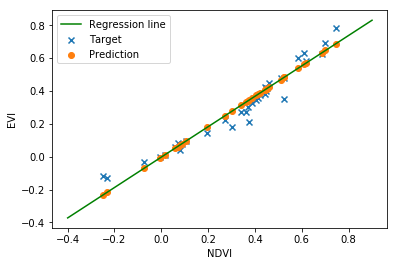

In [11]:
x = np.linspace(-0.4,0.9,100)
fig = plt.figure(figsize=(6,4))
plot_2d = fig.add_subplot(111)

plot_2d.set_xlabel("NDVI")
plot_2d.set_ylabel("EVI")

plot_2d.scatter(unknown["ndvi"], unknown["evi"], label="Target", marker="x")
plot_2d.scatter(unknown["ndvi"], unknown["evi_predicted"], label="Prediction")
plot_2d.plot(x, lr.coef_[0] * x + lr.intercept_, "g", label="Regression line")
plot_2d.legend()
fig.savefig(f"pdf/linear_regression.pdf", 
            dpi=600,
            format="pdf", 
            facecolor="none", 
            alpha=0, 
            edgecolor="none", 
            bbox_inches="tight",
            orientation="portrait")